In [1]:
%load_ext blackcellmagic

In [2]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.integrate as sint
from scipy.spatial import Voronoi

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
@numba.njit
def get_ell(rho):
    """Returns length of cel-cell contacts (hexagon side length) given cell density `rho`. """
    return np.sqrt(2 / (3 * np.sqrt(3) * rho))

In [4]:
def A_cells_um(nc, rho, A_c_rho1=800):
    """
    Returns the area of `nc` cells at density `rho` in 
    micrometers^2.
    `A_c_rho1` is the area of each cell in micrometers^2
    at a density of rho=1.
    """
    return nc * A_c_rho1 / rho

In [5]:
# Cell-cell distance when rho = 1
r0 = np.sqrt(3) * get_ell(rho = 1)

# Contact length when rho = 1
ell0 = r0 / np.sqrt(3)

# Perimeter when rho = 1
P0 = 6 * r0 / np.sqrt(3)

In [6]:
@numba.njit
def rho_t(t, rho_0, rho_max):
    """Returns density at time(s) `t` under logistic assumption."""
    return rho_max * rho_0 * np.exp(t) / (rho_max + rho_0 * (np.exp(t) - 1))

<hr>

#### Define functions for DDE integration

In [7]:
def get_rhs(sender_idx, func):
    """Given the indices of sender cells, returns a 
    function `rhs` with call signature 
    rhs(S, S_delay, *args) that can be passed to 
    `lsig.integrate_DDE` and `lsig.integrate_DDE_varargs`.
    """

    def rhs(S, S_delay, *args):
        return func(S, S_delay, sender_idx, *args)

    return rhs

In [8]:
def tc_rhs_2a_L(S, S_delay, sender_idx, alpha, k, p, delta, L):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get input signal across each interface
    S_bar = L @ S_delay / P0
    
    # Calculate dS/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            k ** p 
            + (delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

In [9]:
@numba.njit
def beta_rho_lin(rho, m=0.2):
    return m + 1 - m * rho

In [10]:
# @numba.njit
def tc_rhs_2b_lin_B(S, S_delay, sender_idx, lambda_, alpha, k, p, delta, Blin):
    """
    """
    
    # Get input signal across each interface
    S_bar = Blin @ S_delay / 6

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            k ** p 
            + (delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

Linear

In [11]:
@numba.njit
def rho_y_t(y, t, psi, y_k, rho_bar, rho_max):
    """
    Density of a deforming lattice over time.
    Initial condition is an exponential gradient, and growth
    follows the logistic equation.
    """
    rho_0 = rho_bar * psi * np.log(psi) / (psi - 1)
    a = np.log(psi) / y_k
    rho_y_0 = rho_0 * np.exp(-a * y)
    return rho_max * rho_y_0 * np.exp(t) / (rho_max + rho_y_0 * (np.exp(t) - 1))
    
@numba.njit
def r_y_t(y, t, psi, y_k, rho_bar, rho_max):
    """
    Cell-cell distance on a deforming lattice over time.
    Initial condition is an exponential gradient, and growth
    follows the logistic equation.
    """
    rhoyt=rho_y_t(y, t, psi, y_k, rho_bar, rho_max)
    return r0/np.sqrt(rhoyt)
    

In [12]:
# Set lattice size
y_k = 200

# Set density at y=0, t=0
psi = 7

# Set average density at time 0 over interval y=[0, y_k]
rho_bar = 2

# Set density at saturation
rho_max = 4

#### Calculating cell locations

First we initialize a square lattice of cells in a hexagonal mesh configuration.

In [13]:
# Set cell-cell distance
r = r0

# Set hex lattice dimensions
rows = cols = int(y_k * 2 / np.sqrt(3) / r) + 1

# Get cell coordinates and # cells
X = lsig.hex_grid(rows, cols, r=r).astype(np.float32)
n = X.shape[0]

# Make y-coordinates non-negative
refx = (cols // 2) * rows + 0
X = X - X[refx]

Then we set the time parameters for simulation.

In [14]:
# Time parameters
# Total time
tmax = 4

# Num steps per time-unit
nt_t = 100

# total num steps
nt = int(nt_t * tmax + 1)

# Time-span
t = np.linspace(0, tmax, nt, dtype=np.float32)

For demonstration purposes, we plot density vs. position for different values of time.

In [15]:
# Set y-values to visualize
ny_ = 100
y_space = np.linspace(0, y_k, ny_)

# Set time-points to visualize
nt_ = 6
t_space_ = np.linspace(0, tmax, nt_)

# Calculate density 
dens_yt = rho_y_t(
    np.tile(y_space, nt_), 
    np.repeat(t_space_, ny_), 
    psi, 
    y_k, 
    rho_bar,
    rho_max,
).reshape(nt_, ny_)

# Convert to DataFrame
data=pd.DataFrame({
    "position"       : np.tile(y_space, nt_),
    "simulation time": np.repeat(t_space_, ny_),
    "density"        : dens_yt.flatten(),
})

:NdOverlay   [simulation time]
   :Curve   [position]   (density,simulation time)
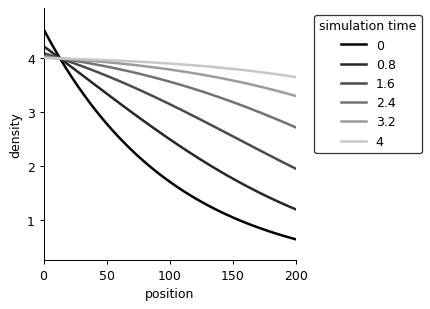

In [16]:
%%capture --no-display

# Set color cycle
cycle = lsig.sample_cycle(cc.b_linear_grey_0_100_c0[:-50], nt_)

# Plot 
plt = hv.Curve(
    data=data,
    kdims=["position"], 
    vdims=["density", "simulation time"]
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(plt, dpi=90)

#### Mapping cell locations

For a cell at coordinates $(x_m, y_m)$, its coordinates under lattice deformation are given by the equations 

\begin{align}
y'_m &= \int_0^{y_m}{r(y,t')\,dy}. \\[1em]
x'_m &= x_m\, r(y_m,t').
\end{align}

If we assume that cell positions are ordered such that $0 = y_0 \leq y_1 \leq\, ... y_m$ and $y'_0=y_0=0$, we can approximate the integral using the trapezoid rule.

\begin{align}
y'_m &\approx \sum_{i=1}^m {\frac{1}{2} \left(r(y_i,t') + r(y_{i-1},t') \right) \left(y_i - y_{i-1}\right)}\\[1em]
x'_m &= x_m\, r(y_m,t')
\end{align}

We use `scipy.integrate.cumtrapz()` from Scipy's integration library to evaluate this cumulative sum.

In [17]:
# Distance between rows of a hexagonal lattice
dy = r * np.sqrt(3)/2

# Initialize mapping
ymap_t = np.zeros((nt, rows))
ryt = np.zeros((nt, rows))
for i, t_ in enumerate(t):
    
    # Get cell-cell distance over y
    ryt[i] = r_y_t(np.arange(rows) * dy, t_, psi, y_k, rho_bar, rho_max)
    
    # Approximate mapped y-coordinates
    ymap = sint.cumtrapz(ryt[i], dx=dy)
    ymap_t[i, 1:rows] = ymap

# Get mapped xy-coordinates
X_t = np.empty((nt, n, 2))
X_t[:, :, 0] = X[:, 0] * np.tile(ryt, (1, cols))
X_t[:, :, 1] = np.tile(ymap_t, (1, cols))

#### Calculating cell-cell contact lengths

To calculate signaling between cells, we require the pairwise matrix of cell-cell contact lengths at every time-point. We note that cells that are too far apart may not signal by contact-dependent means. To estimate this, we approximate each cell as a circle and assign all cells a constant cell radius equal to the side-length of the hexagonal lattice. We then calculate the contact length between two cells as the minimum of the length of their shared Voronoi ridge and the extent of intersecting lens of the two circles. Thus, when $\rho<1$ the intersection length should decrease as $\rho$ decreases, until cells no longer touch.

We store the pairwise length matrix `L` in compressed `csr_matrix` format. This step can take many minutes for large numbers of cells, so we will add a progress bar using the `tqdm` library.

In [18]:
# Progress bar
progress_bar = True

# Get cell radius from cell-cell distance
cr = r/np.sqrt(3)

# Get pairwise contact lengths at each time
iterator = range(nt)
if progress_bar:
    iterator = tqdm(iterator)

Blin_t = []
for t_ in iterator:
    x = X_t[t_]
    rhos = rho_y_t(X[:, 1], t[t_], psi, y_k, rho_bar, rho_max)
    
    Blin_t.append(lsig.make_B_gaps(Voronoi(x), cr, beta_rho_lin, rhos))

Blin_t = np.array(Blin_t)

100%|██████████| 401/401 [09:15<00:00,  1.39s/it]


In [19]:
# Plot total shared surface areas
plt2blin0 = hv.Points(
    (X[:, 1], Blin_t[0] @ np.ones(n) / 6)
).opts(
    s=2,
    xlim=(0, y_k),
    xlabel="position",
    ylabel="% activation",
    title=f"Time = {t[0]:.2f}",
#     ylim=(0, 4),
) 

plt2blinfin = hv.Points(
    (X[:, 1], Blin_t[-1] @ np.ones(n) / 6)
).opts(
    s=2,
    xlim=(0, y_k),
    xlabel="position",
    ylabel="% activation",
    title=f"Time = {t[-1]:.2f}",
#     ylim=(0, 4),
)

# Plot density
dens0=hv.Curve(
    (y_space, dens_yt[0])
).opts(
    color="red",
    xlabel="position",
    ylabel="density",
#     ylim=(0, 4),
)

densfin=hv.Curve(
    (y_space, dens_yt[-1])
).opts(
    color="red",
    xlabel="position",
    ylabel="density",
#     ylim=(0, 4),
)

:Layout
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
   .Curve.I   :Curve   [x]   (y)
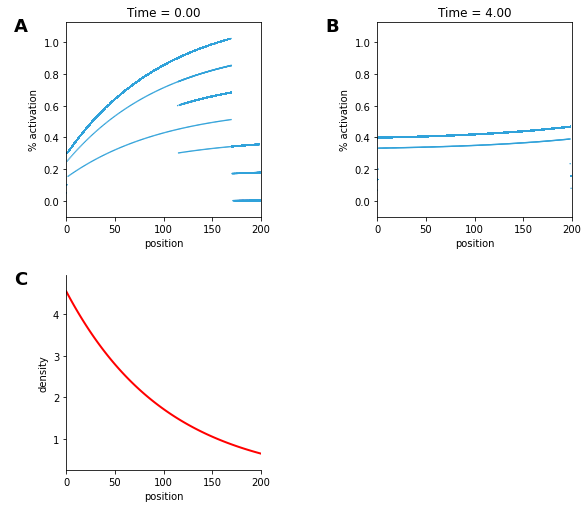

In [20]:
%%capture --no-stdout --no-display

(plt2blin0 + plt2blinfin + dens0).cols(2)

### Simulating signaling under a density gradient

Now we will use our DDE solver to calculate the model-predicted fluorescence under these conditions.

We randomly assign 1% of cells to be sender cells to mimic the 1:100 sender:transceiver co-culture. We fix the random seed for reproducibility, but one can repeat this process with different seeds to show that the gross behavior is minimally affected.

In [21]:
# Specify percent of population that is sender
pct_s = 1
n_s = int(n * (pct_s/100)) + 1

# Set seed
np.random.seed(5)

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

We use our example parameter set

In [22]:
# Set RHS parameters
lambda_ = 1e-5
alpha = 3
k = 0.1
p = 2
delta = 3

# Package into args
args2blin = (lambda_, alpha, k, p, delta, Blin_t[0])

# Set delay
delay = 0.4

Transceivers are initialized at zero-state initial conditions, and senders are fixed at a fluorescence of `1` (by definition). 

Since our parameter `L` (pairwise contact area) varies over time, we use the `lsig.integrate_DDE_varargs` solver, short for "variable argument(s)."

In [23]:
# Get RHS
rhs2blin = get_rhs(sender_idx, tc_rhs_2b_lin_B)

# Set initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

# Perform integration (method of steps)
S_t2blin = lsig.integrate_DDE_varargs(    
    t,
    rhs2blin,
    var_vals=Blin_t,
    dde_args=args2blin,
    E0=S0,
    delay=delay,
    progress_bar=True,
    min_delay=5,
    where_vars=(5,),
)

100%|██████████| 400/400 [00:00<00:00, 493.32it/s]


#### Visualizing a simulated kinematic wave

In order to mimic the appearance of the experiment, we construct a mask of cells inside a circle, similar to the circular culture well.

In [24]:
# Make mask of cells inside circle
X_dists = np.linalg.norm(X - np.array([0, y_k/2]), axis=1)
X_mask = np.array([d <= y_k/2 for d in X_dists])

# Set fluorescence to zero outside circle
S_t2blin_cir = S_t2blin.copy()
for i in range(nt):
    S_t2blin_cir[i, ~X_mask] = 0

We would like to construct a Voronoi mesh and color each cell with its fluorescence value. However, this is not practical for rendering tens to hundreds of thousands of cells per frame. Instead, we will treat each cell centroid as a point in a `ColorMesh` object and use `matplotlib` to render a continuous, interpolated heatmap.

Below, we render a few example frames using `lsig.inspect_out()`. See bottom of notebook for code used to produce video [ref].

In [25]:
# Get plotting window
xlim = -y_k/2, y_k/2
ylim = 0, y_k

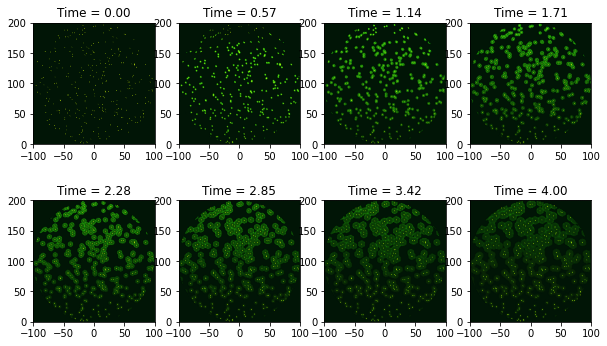

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t2blin_cir, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
    )

<hr>

In [27]:
@numba.njit
def beta_rho_exp(rho, m=0.4):
    return np.exp(-m * (rho - 1))

In [28]:
# @numba.njit
def tc_rhs_2b_exp_B(S, S_delay, sender_idx, lambda_, alpha, k, p, delta, Bexp):
    """
    """
    
    # Get input signal across each interface
    S_bar = Bexp @ S_delay / 6

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            k ** p 
            + (delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

Exponential

In [29]:
# Progress bar
progress_bar = True

# Get cell radius from cell-cell distance
cr = r/np.sqrt(3)

# Get pairwise contact lengths at each time
iterator = range(nt)
if progress_bar:
    iterator = tqdm(iterator)

Bexp_t = []
for t_ in iterator:
    x = X_t[t_]
    rhos = rho_y_t(X[:, 1], t[t_], psi, y_k, rho_bar, rho_max)
    
    Bexp_t.append(lsig.make_B_gaps(Voronoi(x), cr, beta_rho_exp, rhos))

Bexp_t = np.array(Bexp_t)

100%|██████████| 401/401 [08:59<00:00,  1.34s/it]


In [30]:
# Plot total shared surface areas
plt2bexp0 = hv.Points(
    (X[:, 1], Bexp_t[0] @ np.ones(n) / 6)
).opts(
    s=2,
    xlim=(0, y_k),
    xlabel="position",
    ylabel="% activation",
    title=f"Time = {t[0]:.2f}",
#     ylim=(0, 4),
) 

plt2bexpfin = hv.Points(
    (X[:, 1], Bexp_t[-1] @ np.ones(n) / 6)
).opts(
    s=2,
    xlim=(0, y_k),
    xlabel="position",
    ylabel="% activation",
    title=f"Time = {t[-1]:.2f}",
#     ylim=(0, 4),
)

# Plot density
dens0=hv.Curve(
    (y_space, dens_yt[0])
).opts(
    color="red",
    xlabel="position",
    ylabel="density",
#     ylim=(0, 4),
)

densfin=hv.Curve(
    (y_space, dens_yt[-1])
).opts(
    color="red",
    xlabel="position",
    ylabel="density",
#     ylim=(0, 4),
)

:Layout
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
   .Curve.I   :Curve   [x]   (y)
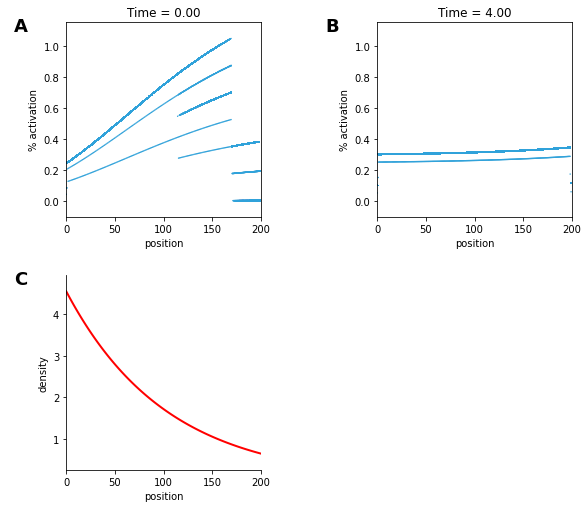

In [31]:
%%capture --no-stdout --no-display

(plt2bexp0 + plt2bexpfin + dens0).cols(2)

In [32]:
# Package into args
args2bexp = (lambda_, alpha, k, p, delta, Bexp_t[0])

In [33]:
# Get RHS
rhs2bexp = get_rhs(sender_idx, tc_rhs_2b_exp_B)

# Set initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

# Perform integration (method of steps)
S_t2bexp = lsig.integrate_DDE_varargs(    
    t,
    rhs2bexp,
    var_vals=Bexp_t,
    dde_args=args2bexp,
    E0=S0,
    delay=delay,
    progress_bar=True,
    min_delay=5,
    where_vars=(5,),
)

100%|██████████| 400/400 [00:00<00:00, 421.73it/s]


#### Visualizing a simulated kinematic wave

In order to mimic the appearance of the experiment, we construct a mask of cells inside a circle, similar to the circular culture well.

In [34]:
# Make mask of cells inside circle
X_dists = np.linalg.norm(X - np.array([0, y_k/2]), axis=1)
X_mask = np.array([d <= y_k/2 for d in X_dists])

# Set fluorescence to zero outside circle
S_t2bexp_cir = S_t2bexp.copy()
for i in range(nt):
    S_t2bexp_cir[i, ~X_mask] = 0

We would like to construct a Voronoi mesh and color each cell with its fluorescence value. However, this is not practical for rendering tens to hundreds of thousands of cells per frame. Instead, we will treat each cell centroid as a point in a `ColorMesh` object and use `matplotlib` to render a continuous, interpolated heatmap.

Below, we render a few example frames using `lsig.inspect_out()`. See bottom of notebook for code used to produce video [ref].

In [35]:
# Get plotting window
xlim = -y_k/2, y_k/2
ylim = 0, y_k

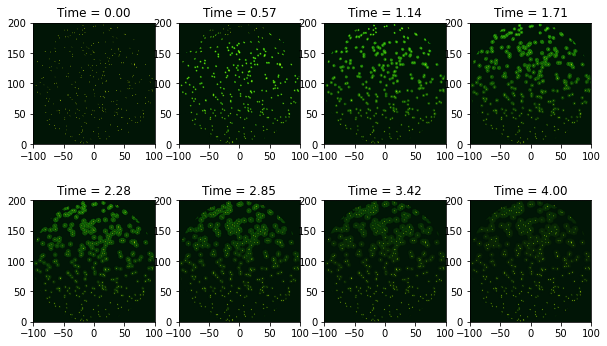

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 2, 4

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t2bexp_cir, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlim,
        ylim=ylim,
        title=title,
    )

#### Quantifying transceiver fluorescence

To understand the simulated transceiver behavior quantitatively, we divide the y-axis into `nbins` bins and sample the time-series at `nt_sample` time-points.

In [37]:
# Set y-bins
nbins = 12
y_bins = np.linspace(0, y_k, nbins + 1)

# Set time-points to sample
nt_sample = 6
t_samples = (np.linspace(0, 4, nt_sample) * nt_t).astype(int)

Experimentally, the sender cell type does not fluoresce strongly in the GFP channel. In order to better compare the *in silico* results to *in vitro*, we sample expression of only the transceiver cells by constructing a mask

In [38]:
# Transceiver mask
tc_mask = X_mask.copy()
tc_mask[sender_idx] = False

# Make bins for histogram
tc_hist = np.digitize(X[tc_mask, 1], bins = y_bins)

# Sample transceiver fluroescence
S_t2blin_samp_tc = S_t2blin[t_samples][:, tc_mask]
S_t2bexp_samp_tc = S_t2bexp[t_samples][:, tc_mask]

Then we calculate mean fluorescence, normalized to the maximum fluorescence at that time-point.

In [39]:
# Get fluor in bins
tc2blin_fluor_t_bins = np.zeros((t_samples.size, nbins))
for b in range(nbins):
    tc2blin_fluor_t_bins[:, b] = S_t2blin_samp_tc[:, tc_hist == (b + 1)].mean(axis=1)

# Normalize
tc2blin_normfluor_t_bins = np.zeros((t_samples.size, nbins))
tc2blin_normfluor_t_bins = tc2blin_fluor_t_bins / tc2blin_fluor_t_bins.max(axis=1)[:, np.newaxis]
tc2blin_normfluor_t_bins = np.nan_to_num(tc2blin_normfluor_t_bins)

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [40]:
# Get fluor in bins
tc2bexp_fluor_t_bins = np.zeros((t_samples.size, nbins))
for b in range(nbins):
    tc2bexp_fluor_t_bins[:, b] = S_t2bexp_samp_tc[:, tc_hist == (b + 1)].mean(axis=1)

# Normalize
tc2bexp_normfluor_t_bins = np.zeros((t_samples.size, nbins))
tc2bexp_normfluor_t_bins = tc2bexp_fluor_t_bins / tc2bexp_fluor_t_bins.max(axis=1)[:, np.newaxis]
tc2bexp_normfluor_t_bins = np.nan_to_num(tc2bexp_normfluor_t_bins)

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Finally, we convert to DataFrame and plot a curve of normalized fluorescence over y-position at sampled time-points.

In [41]:
# Make DataFraem
normdata2blin = pd.DataFrame(
    tc2blin_normfluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t[t_samples],
).reset_index().melt(id_vars="index")
normdata2blin.columns = ["simulation time", "position", "normalized fluorescence"]

In [42]:
# Make DataFraem
normdata2bexp = pd.DataFrame(
    tc2bexp_normfluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t[t_samples],
).reset_index().melt(id_vars="index")
normdata2bexp.columns = ["simulation time", "position", "normalized fluorescence"]

In [43]:
# make color cycle
cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nt_sample)

# Plot
p2blin = hv.Curve(
    data=normdata2blin,
    kdims=["position"],
    vdims=["normalized fluorescence", "simulation time"],
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

p2bexp = hv.Curve(
    data=normdata2bexp,
    kdims=["position"],
    vdims=["normalized fluorescence", "simulation time"],
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)


:Layout
   .NdOverlay.I  :NdOverlay   [simulation time]
      :Curve   [position]   (normalized fluorescence,simulation time)
   .NdOverlay.II :NdOverlay   [simulation time]
      :Curve   [position]   (normalized fluorescence,simulation time)
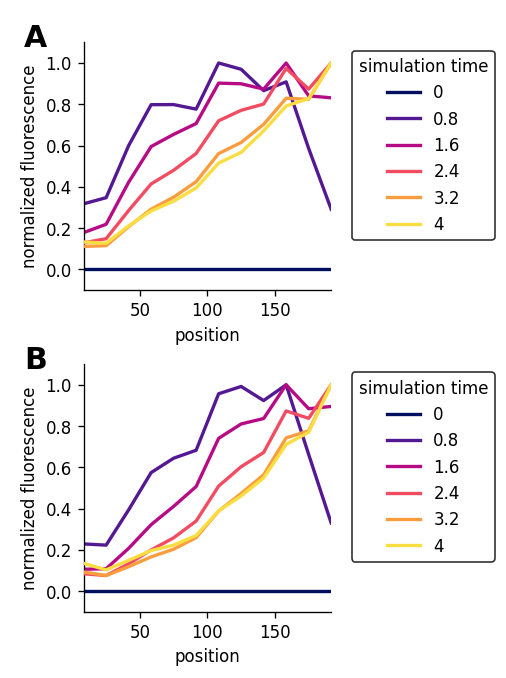

In [44]:
%%capture --no-stdout --no-display

hv.output((p2blin + p2bexp).cols(1), dpi=120)

<hr>

In [45]:
import os

### Save video

In [46]:
# Set directory
dir_name = "plots"

# Set filenames
vid2blin_fname = "linear_model_density_gradient_rhobar_{0:.2f}_{1:.1f}pctsender".format(
    rho_bar, pct_s
)
vid2bexp_fname = "exponential_model_density_gradient_rhobar_{0:.2f}_{1:.1f}pctsender".format(
    rho_bar, pct_s
)

In [47]:
# Function for plot title
title_fun = lambda i: f"Time = {t[i]:.2f}"

Writing to: plots\linear_model_density_gradient_rhobar_2.00_1.0pctsender


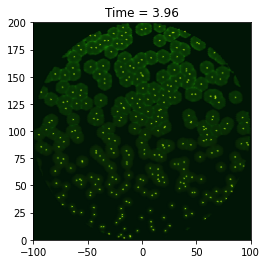

In [48]:
lsig.animate_colormesh(
    X_arr=X,
    rows=rows,
    cols=cols,
    var_t=S_t2blin_cir,
    n_frames=100,
    file_name=vid2blin_fname,
    dir_name=dir_name,
    fps=20, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
)

Writing to: plots\exponential_model_density_gradient_rhobar_2.00_1.0pctsender


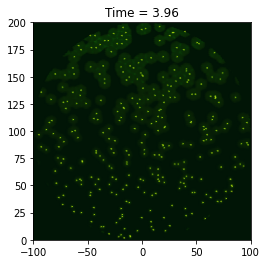

In [49]:
lsig.animate_colormesh(
    X_arr=X,
    rows=rows,
    cols=cols,
    var_t=S_t2bexp_cir,
    n_frames=100,
    file_name=vid2bexp_fname,
    dir_name=dir_name,
    fps=20, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlim,
    ylim=ylim,
)

### Save plots

In [50]:
# Set directory
dir_name = "plots"

# Set filename
p2blin_fname = "linear_model_density_gradient_plot_rhobar_{0:.2f}_{1:.1f}pctsender".format(
    rho_bar, pct_s
)
p2bexp_fname = "exponential_model_density_gradient_plot_rhobar_{0:.2f}_{1:.1f}pctsender".format(
    rho_bar, pct_s
)

# Set format
fmt='png'

In [51]:
%%capture --no-display

p2blin_path = os.path.join(dir_name, p2blin_fname)
hv.save(p2blin, p2blin_path, fmt=fmt)

p2bexp_path = os.path.join(dir_name, p2bexp_fname)
hv.save(p2bexp, p2bexp_path, fmt=fmt)

<hr>

In [52]:
%load_ext watermark

In [53]:
%watermark -v -p numpy,scipy,numba,holoviews,jupyterlab

CPython 3.7.7
IPython 7.18.1

numpy 1.18.1
scipy 1.4.1
numba 0.51.2
holoviews 1.13.2
jupyterlab 1.2.6


\begin{align}
\beta(\rho) &\propto \frac{1}{\sqrt{\rho}}\\
\end{align}



\begin{align}
A_\text{cell} = \rho^{-1} \quad \text{and} \quad A_\text{cell} = \frac{3 \sqrt{3}}{2} \ell^2\\
\ell = \sqrt\frac{2}{3 \sqrt{3} \rho}\\
\end{align}




\begin{align}
\frac{\mathrm{d} \rho(t)}{\mathrm{d} t} &= g\cdot\rho(t)\, \left(1 - \frac{\rho(t)}{\rho_{\text{max}}}\right),
\end{align}


    lambda_ = 1e-5
    alpha   = 3
    k       = 0.12
    p       = 2
    delta   = 3
